# Multilabel Classification

Until now each instance has always been assigned to just one class. In some
cases you may want your classifier to output multiple classes for each
instance.

Not all classifiers support multilabel classification

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('datasets/mnist_dataset.csv',index_col=0)
dataset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [3]:
X = dataset.iloc[:,:784]
y = dataset['class']

In [4]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [5]:
y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [7]:
five_digit = X.iloc[0]

In [8]:
knn.predict([five_digit])

C:\Users\McArthur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

The digit 5 is indeed not large (False) and odd (True)

# Model Evaluation

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. One approach is to measure the F1 score for each individual label,then simply compute the average score 

In [9]:
y_train_knn_pred = cross_val_predict(knn, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

# Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).


In [10]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [57]:
import matplotlib.pyplot as plt

def plot_digit(pixel_array):
    if  type(pixel_array) is np.ndarray:
        dirty_d = pixel_array.reshape(28,28)
        plt.imshow(dirty_d, cmap = 'binary')
        plt.axis('off')
        plt.show()
    else:
        dirty_d = pixel_array.to_numpy()
        dirty_d = dirty_d.reshape(28,28)
        plt.imshow(dirty_d, cmap = 'binary')
        plt.axis('off')
        plt.show()

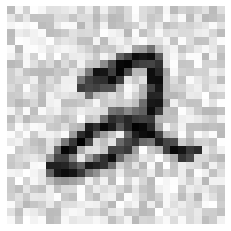

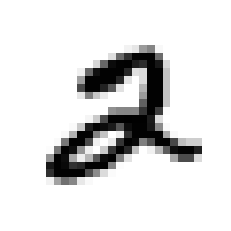

In [58]:
some_digit = X_train_mod.iloc[5]
clean_version = y_train_mod.iloc[5]

plot_digit(some_digit)
plot_digit(clean_version)

In [24]:
knn.fit(X_train_mod, y_train_mod)
clean_digit = knn.predict([X_test_mod.iloc[45]])

C:\Users\McArthur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


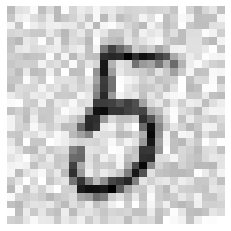

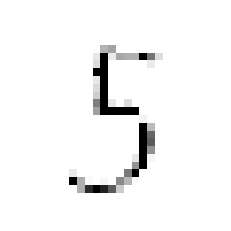

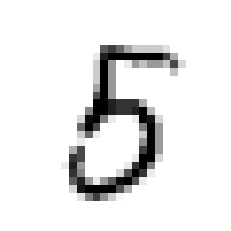

In [52]:
dirty_img = X_test_mod.iloc[45]
plot_digit(dirty_img)
plot_digit(clean_digit)
orig = y_test_mod.iloc[45]
plot_digit(orig)